In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data=pd.read_csv("banana_quality.csv")
train_data

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [3]:
train_data.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


In [18]:
train_data.head()


<bound method Series.count of 0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
7995     Bad
7996     Bad
7997     Bad
7998     Bad
7999     Bad
Name: Quality, Length: 8000, dtype: object>

In [6]:
nan_count=train_data.isnull().sum(axis=0)

In [7]:
nan_count


Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
data=train_data.dropna(axis=0)
data

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [9]:
import seaborn as sns

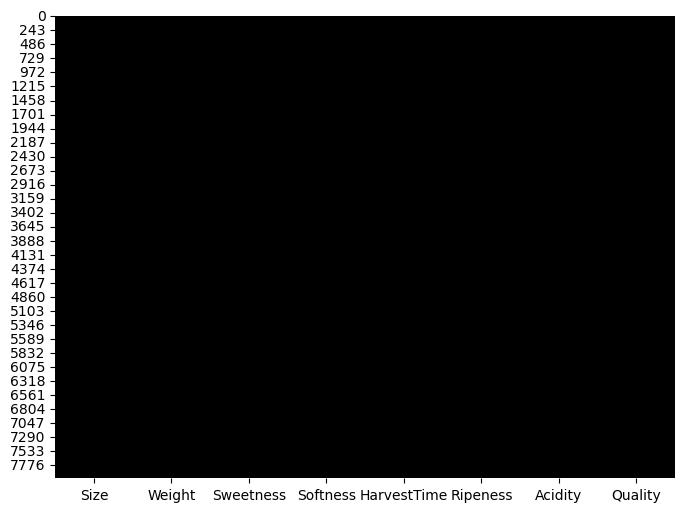

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(),cbar=False,cmap="binary_r")
plt.show()

Text(0, 0.5, 'Y')

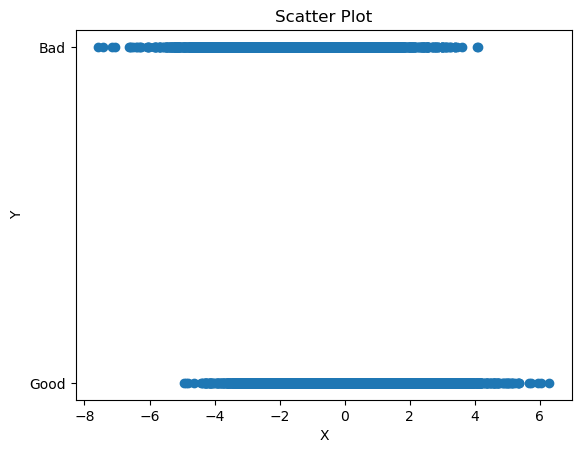

In [14]:
plt.scatter(data['HarvestTime'],data['Quality'])
plt.title("Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")

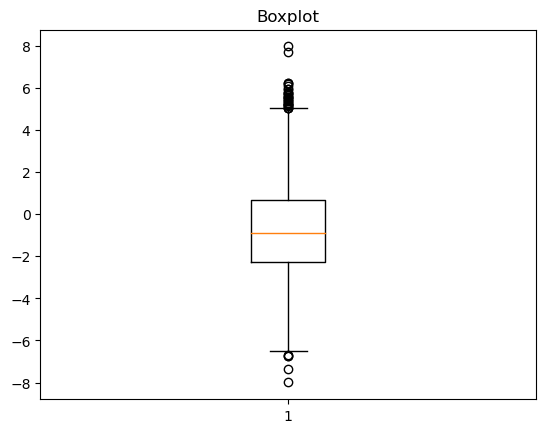

In [26]:
plt.boxplot(data['Size'])
plt.title("Boxplot")
plt.show()

In [35]:
for column_name in ['Weight', 'Size', 'Sweetness', 'Ripeness', 'Acidity']:
# Assuming df is your DataFrame and 'column_name' is the column for which you want to check outliers
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the boundary for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get the number of outliers
    outliars = data[(data[column_name] < lower_bound) |
                    (data[column_name] > upper_bound)]
    num_outliars = outliars.shape[0]

    print(f'There are {num_outliars} outliars.')
    data[f'Adjusted_{column_name}'] = np.where((data[column_name] < lower_bound) | (
    data[column_name] > upper_bound), np.nan, data[column_name])

# Calculate the mean of the non-outlier values
    mean = data[f'Adjusted_{column_name}'].mean()

# Replace the NaNs in the 'Adjusted' column with the mean
    data[f'Adjusted_{column_name}'].fillna(mean, inplace=True)
    data = data.drop(columns=column_name, axis = 1)

KeyError: 'Weight'